In [1]:
from nearest_neighbor_search import *
from read_data import *
import time
from optparse import OptionParser

# Command line parameters
NUM_KENYON 	= -1    # Number of Kenyon cells
PROJECTION 	= -1    # type of projection from glomeruli onto kenyon cells
HASH_LENGTH = -1    # hash length

# Dataset parameters
NUM_NNS		= -1		# number of nearest neighbors to validate over
FEATURES 	= -1		# number of features in the dataset
NUM_ODORS 	= -1		# number of odors in the dataset

start = time.time()

In [2]:
usage="usage: %prog [options]"
parser = OptionParser(usage=usage)
parser.add_option("-p", "--projection", action="store", type="string", dest="projection", default="DG",help="type of random projection: DG (dense Gaussian), SB6 (sparse, binary with sampling=6)")
parser.add_option("-y", "--kenyon", action="store", type="int", dest="num_kenyon", default=1000,help="number of kenyon cells (i.e. expansion size)")    
parser.add_option("-w", "--wta", action="store", type="string", dest="wta", default=None,help="type of WTA to perform (top, bottom, rand)")
parser.add_option("-l", "--hash", action="store", type="int", dest="hash_length", default=8,help="length of the hash")
parser.add_option("-d", "--dataset", action="store", type="string", dest="dataset", default="halem",help="name of the dataset")


<Option at 0x7fb9040f4ef0: -d/--dataset>

In [3]:
NUM_REPEATS 	= 50
NUM_KENYON 		= 1000
PROJECTION 		= "DG" # dense gaussian, also SB6
HASH_LENGTH 	= 8
DATASET 		= "mnist10k"
WTA 			= "random" 

In [4]:
if DATASET == "gist10k":
    NUM_ODORS 	= 10000
    FEATURES 	= 960
    D 			= read_generic_data('/home/navlakha/projects/fly_hashing/data/gist_small/gist10k.txt', NUM_ODORS, FEATURES)

# SIFT data: 10000 images x 128 sift descriptor
elif DATASET == "sift10k":
    NUM_ODORS 	= 10000
    FEATURES 	= 128
    D 			= read_generic_data('/home/navlakha/projects/fly_hashing/data/sift_small/sift10k.txt', NUM_ODORS, FEATURES) 

# MNIST data: 10000 images x 784 pixels
elif DATASET == "mnist10k":
    print('Here!')
    NUM_ODORS 	= 10000
    FEATURES 	= 784
    D= read_generic_data('/home/navlakha/projects/fly_hashing/data/mnist/mnist10k.txt', NUM_ODORS, FEATURES) 

Here!


In [5]:
assert D.shape[0] == NUM_ODORS
assert D.shape[1] == FEATURES

In [6]:
numNNs = max(10, int(0.02*NUM_ODORS))
accuracy, std_dev = nearest_neighbor_search(D, WTA, HASH_LENGTH, PROJECTION, NUM_KENYON, NUM_REPEATS, numNNs)

In [10]:
accuracy_top, std_dev_top = nearest_neighbor_search(D, "top", HASH_LENGTH, PROJECTION, NUM_KENYON, NUM_REPEATS, numNNs)

In [11]:
accuracy_top

0.5109444808988852

In [12]:
accuracy

0.31951672686451915

In [13]:
import matplotlib.pyplot as plt

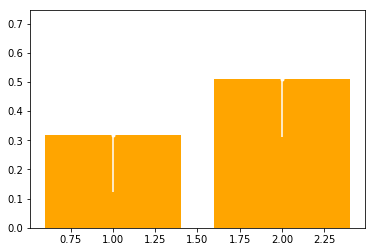

In [54]:
plt.bar([1,2],[accuracy, accuracy_top],color='orange')
plt.errorbar([1,2],[accuracy, accuracy_top],[std_dev,std_dev_top],fmt='w.')
plt.show()

In [56]:
hash_lengths = [2, 6, 12, 18, 24]
NUM_REPEATS = 30 # save time, still good stats
acc = np.zeros((2,len(hash_lengths))) # first row is top, second is random
std = acc
for hash in range(len(hash_lengths)):
    this_hash = hash_lengths[hash]
    print('Running:' + str(this_hash))
    acc[0,hash], std[0,hash] =  nearest_neighbor_search(D, "top", this_hash, PROJECTION, NUM_KENYON, NUM_REPEATS, numNNs)
    acc[1,hash], std[1,hash] =  nearest_neighbor_search(D, "random", this_hash, PROJECTION, NUM_KENYON, NUM_REPEATS, numNNs)

Running:2
Running:6
Running:12
Running:18
Running:24


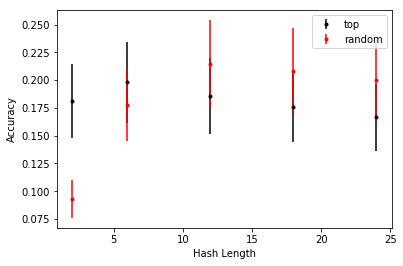

In [67]:
ste = NUM_REPEATS**-.5
plt.errorbar(hash_lengths,acc[0,:],std[0,:]*ste,fmt='k.',label = 'top')
plt.errorbar(hash_lengths,acc[1,:],std[1,:]*ste,fmt='r.',label = 'random')
plt.xlabel('Hash Length')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [68]:
PROJECTION = "SB6"
acc2 = np.zeros((2,len(hash_lengths))) # first row is top, second is random
std2 = acc2
for hash in range(len(hash_lengths)):
    this_hash = hash_lengths[hash]
    print('Running:' + str(this_hash))
    acc2[0,hash], std2[0,hash] =  nearest_neighbor_search(D, "top", this_hash, PROJECTION, NUM_KENYON, NUM_REPEATS, numNNs)
    acc2[1,hash], std2[1,hash] =  nearest_neighbor_search(D, "random", this_hash, PROJECTION, NUM_KENYON, NUM_REPEATS, numNNs)

Running:2
Running:6
Running:12
Running:18
Running:24


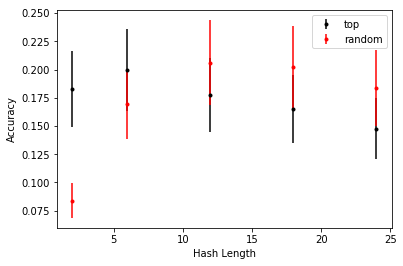

In [69]:
plt.errorbar(hash_lengths,acc2[0,:],std2[0,:]*ste,fmt='k.',label = 'top')
plt.errorbar(hash_lengths,acc2[1,:],std2[1,:]*ste,fmt='r.',label = 'random')
plt.xlabel('Hash Length')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [74]:
hash_lengths = [2, 6, 12, 18, 24, 32]
acc3 = np.zeros((3,len(hash_lengths))) # first row is top, second is random
std3 = acc3
for hash in range(len(hash_lengths)):
    this_hash = hash_lengths[hash]
    print('Running:' + str(this_hash))
    acc3[0,hash], std3[0,hash] =  nearest_neighbor_search(D, "top", this_hash, 'SB6', this_hash*20, NUM_REPEATS, numNNs)
    acc3[1,hash], std3[1,hash] =  nearest_neighbor_search(D, "random", this_hash, 'SB6', this_hash*20, NUM_REPEATS, numNNs)
    acc3[2,hash], std3[2,hash] =  nearest_neighbor_search(D, "all", this_hash, 'SB6', this_hash, NUM_REPEATS, numNNs)

Running:2
Running:6
Running:12
Running:18
Running:24
Running:32


array([[0.18273197, 0.19971613, 0.17743897, 0.16484916, 0.14755196],
       [0.08399048, 0.16984345, 0.20598385, 0.20177164, 0.18340986]])

200